# Loan Risk Analysis

In [5]:
import pandas as pd
loans_2007 = pd.read_csv("loans_2007.csv")
loans_2007.drop_duplicates()
print(loans_2007.info())
print(loans_2007.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [6]:
## Remove unwanted features after looking into documentation
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

In [7]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In [ ]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)

In [10]:
print(loans_2007.info())
print(loans_2007.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
loan_amnt                     42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
title                         42522 non-null object
addr_state                    42535 non-null object
dti                           42535 non-null float64
delinq_2yrs                   42506 non-null float64
earliest_cr_line              42506 non-null object
inq_last_6mths                42506 non-null float64
o

In [9]:
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


In [11]:
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [12]:
## Drop features that has only one unique value

orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


# Preparing Features

In [13]:
loans = loans_2007
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [14]:
loans = loans.drop("pub_rec_bankruptcies", axis=1)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())

object     11
float64    10
int64       1
dtype: int64


In [15]:
## Object columns
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


In [16]:
## Categorical features
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
LA     420
AL     420
KY     311
OK     285
KS     249
UT     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      60
VT  

In [17]:
##The home_ownership, verification_status, emp_length, term, and addr_state columns all contain multiple discrete values. We should clean the emp_length column and treat it as a numerical one since the values have ordering (2 years of employment is less than 8 years).
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt Consolidation                                              2068
Debt Consolidation Loan                                         1599
Personal Loan                                                    624
Consolidation                                                    488
debt consolidation                                               466
Credit Card Consolidation                                        345
Home Improvement                                                 336
Debt consolidation                                               314
Small Business Loan                                              298
Credit Card Loan                                                 294
Personal                                                         290
Consolidation Loan                                               250
Home Improvement Loan                                            228
personal loan                                                    219
Loan                              

In [18]:
## Convert some object columns to numerical features
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [19]:
## Convert categorical feature to dummy variables
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

## Making Prediction

Optimize for
* high recall (true positive rate) tpr = tp / (tp + fn)
* low fall-out (false positive rate) fpr = fp / (fp + tn)

In [20]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 38 columns):
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
emp_length                             37675 non-null object
annual_inc                             37675 non-null float64
loan_status                            37675 non-null int64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                             37675 non-null float64
total_acc                              37675 non-null float64
home_ownership_MORTGAGE   

In [32]:
## Logistic Regressoin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
lr = LogisticRegression()
cols = loans.columns
train_cols = cols.drop("loan_status")
features = loans[train_cols]
target = loans["loan_status"]
lr.fit(features, target)
y_predict_probabilities = lr.predict_proba(features)[:,1]

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
fpr, tpr, _ = roc_curve(target, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

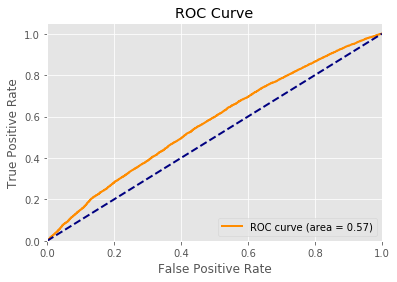

In [34]:
## Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
## ROC With Cross Validation and 
## Balanced the class weight
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(class_weight="balanced") # blance calss weight
y_predict_probabilities = cross_val_predict(lr, features, 
                                            target, 
                                            cv=3,method = 'predict_proba')[:,1]
y_predict_probabilities = pd.Series(y_predict_probabilities)

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


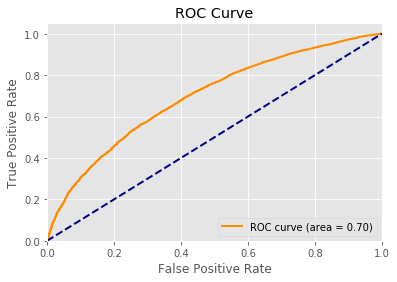

In [38]:
fpr, tpr, _ = roc_curve(target, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
## Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We significantly improved false positive rate in the last screen by balancing the classes, which reduced true positive rate. Our true positive rate is now around 66%, and our false positive rate is around 39%. From a conservative investor's standpoint, it's reassuring that the false positive rate is lower because it means that we'll be able to do a better job at avoiding bad loans than if we funded everything. However, we'd only ever decide to fund 66% of the total loans (true positive rate), so we'd immediately reject a good amount of loans.

We can try to lower the false positive rate further by assigning a harsher penalty for misclassifying the negative class. While setting class_weight to balanced will automatically set a penalty based on the number of 1s and 0s in the column, we can also set a manual penalty. In the last screen, the penalty scikit-learn imposed for misclassifying a 0 would have been around 5.89 (since there are 5.89 times as many 1s as 0s).

We can also specify a penalty manually if we want to adjust the rates more. To do this, we need to pass in a dictionary of penalty values to the class_weight parameter

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

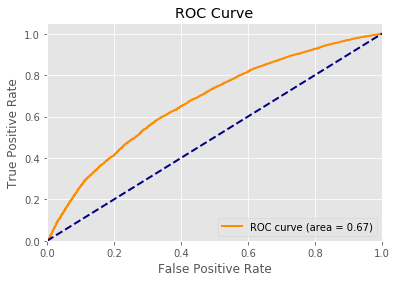

In [39]:
## Manunally set penalty
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)
y_predict_probabilities = cross_val_predict(lr, features, 
                                            target, 
                                            cv=3,method = 'predict_proba')[:,1]
y_predict_probabilities = pd.Series(y_predict_probabilities)

fpr, tpr, _ = roc_curve(target, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
## Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


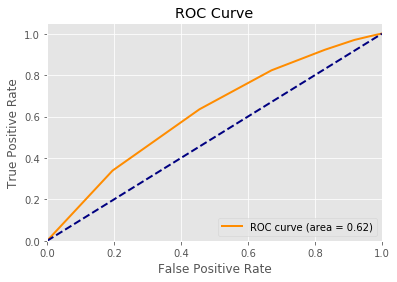

In [43]:
## RandomFrorest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", random_state=1)
y_predict_probabilities = cross_val_predict(rf, features, 
                                            target, 
                                            cv=3,method = 'predict_proba')[:,1]
y_predict_probabilities = pd.Series(y_predict_probabilities)

fpr, tpr, _ = roc_curve(target, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
## Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Unfortunately, using a random forest classifier didn't improve our false positive rate. The model is likely weighting too heavily on the 1 class, and still mostly predicting 1s. We could fix this by applying a harsher penalty for misclassifications of 0s.

Ultimately, our best model had a false positive rate of nearly 9%, and a true positive rate of nearly 24%. For a conservative investor, this means that they make money as long as the interest rate is high enough to offset the losses from 9% of borrowers defaulting, and that the pool of 24% of borrowers is large enough to make enough interest money to offset the losses.